# Notes

The data is a ragger tensor where each sample is a sequence of integers of variable length (i.e., padding may be needed). Therefore, the data is integer encoded (i.e., word-level tokenization). Encoding is based on
frequency such taht the integer 3 encodes the third most frequent word
in the dataset. Every sequence begins with a '1' indicating the start
of a sentence. Might remove this? Is EOS of BOS needed for this task?

The dataset consists of 25,000 sentences with an associated label for sentiment.

Since approximately 95% of the input data can be covered by using sentences with length 0 to 600, then the remaining sentences will be discarded. The min sentence length is 11 while the max sentence length is 2,494.

Consider how "Term Frequency, Inverse Document Frequency (TF-IDF)" should be used? This appears to be more common for N-gram models (bag-of-words).

Kinds of NLP tasks (Deep Learning with Python 2ed, p. 310):
* Sequence modeling (word order matters, therefore word level)
* Bag-of-words (word order doesn't matter, N-grams)
* Text generation
* Text classification (what's the topic)
* Content filtering 
* Sentiment Analysis (positive or negative sounding?)
* Language modeling (next word in sentence)
* Translation
* Summarization

In [77]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Explore Data

In [2]:
print(tf.__version__)

2.6.0


In [3]:
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data()

In [4]:
# Dataset shapes and types
print(type(x_train), x_train.shape, y_train.shape)
print(type(x_test), x_test.shape, y_test.shape)

<class 'numpy.ndarray'> (25000,) (25000,)
<class 'numpy.ndarray'> (25000,) (25000,)


In [5]:
# Dictionaries
stoi = datasets.imdb.get_word_index()
itos = {int_: str_ for str_, int_ in stoi.items()}

In [6]:
print(x_train[0][:10])
print(x_train[1][:10])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463]


In [73]:
subsequence_lengths = [len(subsequence) for subsequence in x_train]
print(min(subsequence_lengths))
print(max(subsequence_lengths))

11
2494


In [59]:
def bin_ixs_in_threshold(normed_hist, threshold):
    sum_ = 0
    for ix, prop in enumerate(normed_hist):
        sum_ += prop
        if sum_ >= threshold:
            return slice(0, ix+1)

In [71]:
subsequence_np_hist, subsequence_np_bins = np.histogram(
    subsequence_lengths, bins=100, density=False)

# Each element tells the proportion of sentences (i.e., samples)
# that correlate with a given sentence length
subseqence_hist_sum_normed = subsequence_np_hist/sum(subsequence_np_hist)

print(subsequence_np_bins[bin_ixs_in_threshold(
    normed_hist=subseqence_hist_sum_normed, 
    threshold=0.95)])

[ 11.    35.83  60.66  85.49 110.32 135.15 159.98 184.81 209.64 234.47
 259.3  284.13 308.96 333.79 358.62 383.45 408.28 433.11 457.94 482.77
 507.6  532.43 557.26 582.09 606.92]


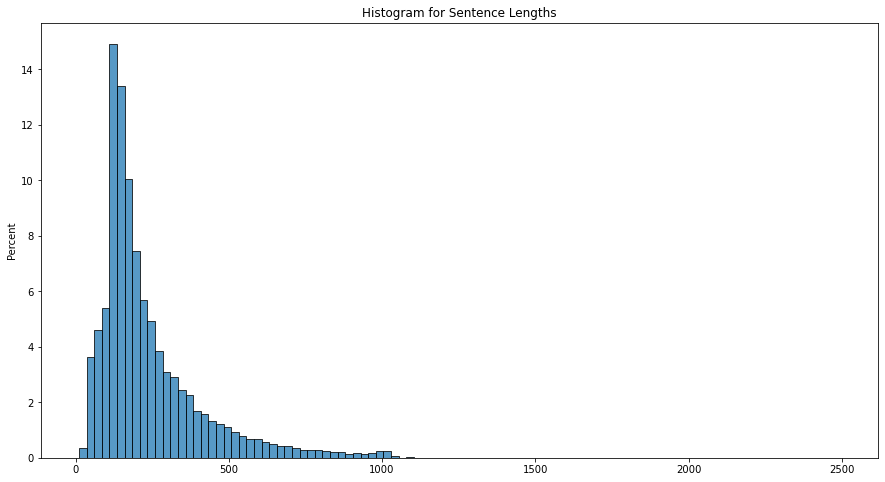

In [72]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.histplot(subsequence_lengths, bins=100, stat='percent', ax=ax)
ax.set_title('Histogram for Sentence Lengths')
fig.savefig('sentence_length_hist.svg', bbox_inches='tight')

# Load Appropriate Data

In [78]:
# Max length is based on the subsequence length that will capture
# roughly 95% of the total data
maxlen = int(
        subsequence_np_bins[bin_ixs_in_threshold(
            normed_hist=subseqence_hist_sum_normed,
            threshold=0.95)][-1])
            
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(
    maxlen=maxlen)

In [79]:
print(maxlen)

606


In [80]:
x_pad_train, x_pad_test = \
    pad_sequences(x_train, maxlen=maxlen, padding='post'), \
    pad_sequences(x_test, maxlen=maxlen, padding='post'),

In [82]:
print(np.count_nonzero(x_pad_train[0]), len(x_pad_train[0]))

218 606
